<a href="https://colab.research.google.com/github/SimpleVlad/SpectralBias/blob/master/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [406]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from argparse import Namespace
from functools import reduce
import numpy as np
import random

sns.set()
%matplotlib inline

In [407]:
def make_phased_waves(opt):
    t = np.arange(0, 1, 1./opt.N)
    if opt.A is None:
        yt = reduce(lambda a, b: a + b, 
                    [np.sin(2 * np.pi * ki * t + 2 * np.pi * phi) for ki, phi in zip(opt.K, opt.PHI)])
    else:
        yt = reduce(lambda a, b: a + b, 
                    [Ai * np.sin(2 * np.pi * ki * t + 2 * np.pi * phi) for ki, Ai, phi in zip(opt.K, opt.A, opt.PHI)])
    return t, yt

In [408]:
def make_plot_sin(opt, x ,y):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9, 4))
    ax0.set_title("Function")
    ax0.plot(x, y)
    ax0.set_xlabel("x")
    ax0.set_ylabel("f(x)")    

In [409]:
opt = Namespace()
data = Namespace()

opt.N = 200
opt.K = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
opt.A = [1 for _ in opt.K]
opt.PHI = [np.random.rand() for _ in opt.K] 

In [410]:
x, y = make_phased_waves(opt)
data.x = x
data.y = y
print(x)
print(y)


[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [411]:
def data_gen(x ,y , opt):
    x_train = x
    y_train = y
    y_test = y
    x_test = x
    return x_train, y_train, x_test, y_test

In [412]:
# (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train = x
y_train = y
y_test = y
x_test = x
print(x_train.shape)

(200,)


[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

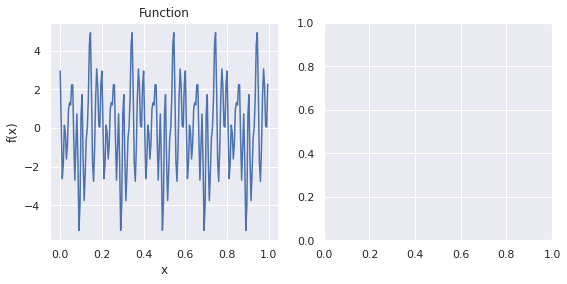

In [413]:
print(x_train)
# Среднее значение
# mean = x_train.mean(axis=0)
# # Стандартное отклонение
# std = x_train.std(axis=0)
# x_train -= mean
# x_train /= std
# x_test -= mean
# x_test /= std
print(x_train)
print(y_train)
make_plot_sin(opt, x, y)

In [414]:
# Подготовка
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(1,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [415]:
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
200/200 - 0s - loss: 5.0483 - mae: 1.8263
Epoch 2/100
200/200 - 0s - loss: 5.0215 - mae: 1.8109
Epoch 3/100
200/200 - 0s - loss: 5.0187 - mae: 1.8088
Epoch 4/100
200/200 - 0s - loss: 5.0161 - mae: 1.8124
Epoch 5/100
200/200 - 0s - loss: 5.0173 - mae: 1.8103
Epoch 6/100
200/200 - 0s - loss: 5.0138 - mae: 1.8100
Epoch 7/100
200/200 - 0s - loss: 5.0149 - mae: 1.8126
Epoch 8/100
200/200 - 0s - loss: 5.0122 - mae: 1.8075
Epoch 9/100
200/200 - 0s - loss: 5.0112 - mae: 1.8076
Epoch 10/100
200/200 - 0s - loss: 5.0179 - mae: 1.8120
Epoch 11/100
200/200 - 0s - loss: 5.0134 - mae: 1.8099
Epoch 12/100
200/200 - 0s - loss: 5.0175 - mae: 1.8081
Epoch 13/100
200/200 - 0s - loss: 5.0088 - mae: 1.8087
Epoch 14/100
200/200 - 0s - loss: 5.0169 - mae: 1.8123
Epoch 15/100
200/200 - 0s - loss: 5.0089 - mae: 1.8094
Epoch 16/100
200/200 - 0s - loss: 5.0151 - mae: 1.8104
Epoch 17/100
200/200 - 0s - loss: 5.0076 - mae: 1.8098
Epoch 18/100
200/200 - 0s - loss: 5.0125 - mae: 1.8094
Epoch 19/100
200/20

In [416]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)

In [417]:
print("Средняя абсолютная ошибка (тысяч долларов):", mae)

Средняя абсолютная ошибка (тысяч долларов): 1.8084384202957153


In [418]:
pred = model.predict(x)

In [419]:
print("Предсказанная стоимость:", pred[1][0], ", правильная стоимость:", y_test[1])

Предсказанная стоимость: -0.087423176 , правильная стоимость: 0.1132318747137025


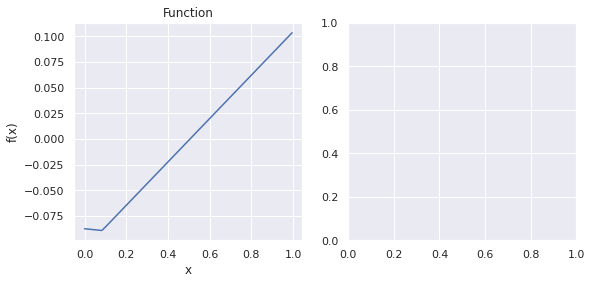

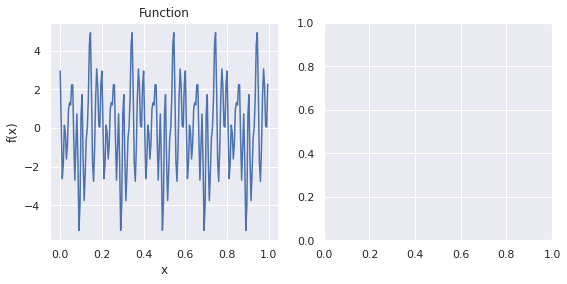

In [420]:
make_plot_sin(opt, x_train, pred)
make_plot_sin(opt, x, y)
# print(pred)
# print(y)
# print(x_test)
# print(x)